In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv("presidential_debate_2016.csv")

In [24]:
n_rows, n_features = data.shape

print("Number of rows = {}".format(n_rows))
print("Number of features = {}".format(n_features))

Number of rows = 100000
Number of features = 28


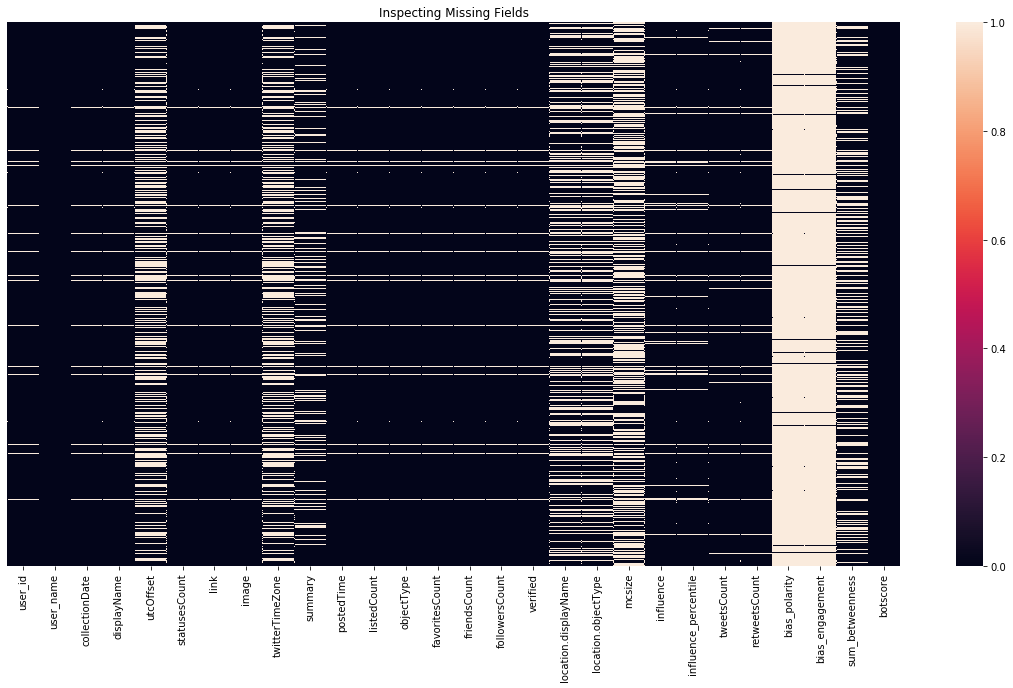

In [30]:
# Inspect missing values
plt.figure(figsize=(20,10))

sns.heatmap(data.isnull())
plt.title("Inspecting Missing Fields")
plt.yticks([])

plt.show()

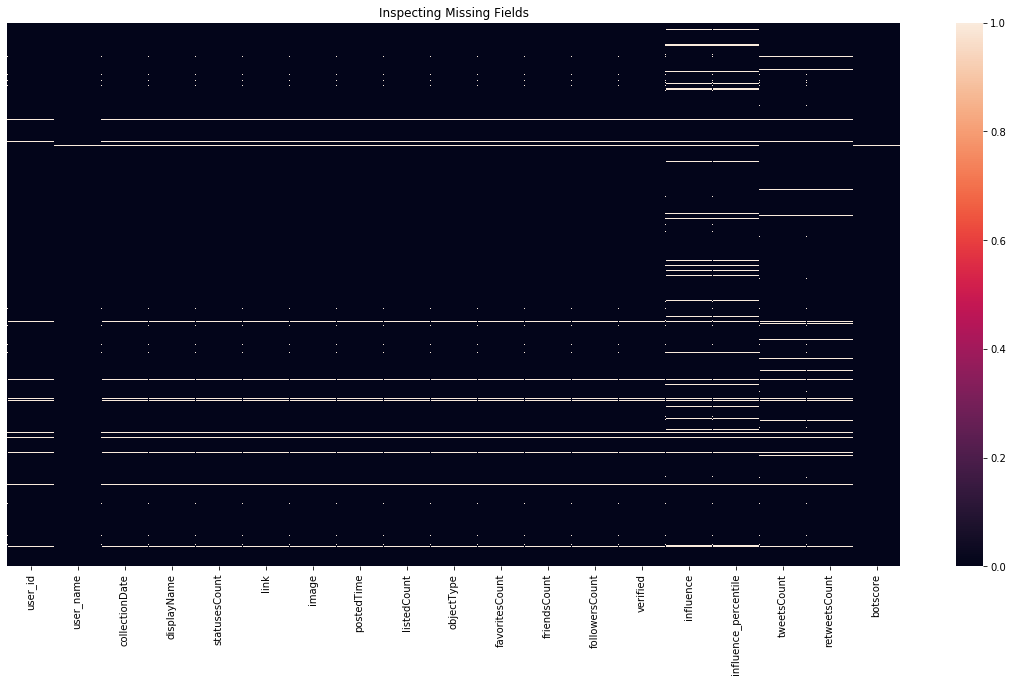

In [61]:
missing_perc_thresh = 15

missing_perc = data.isnull().sum() / n_rows * 100 

remove_cols = data.columns[missing_perc > missing_perc_thresh]

df = data.drop(remove_cols, axis=1)

# Inspect missing values
plt.figure(figsize=(20,10))

sns.heatmap(df.isnull())
plt.title("Inspecting Missing Fields")
plt.yticks([])

plt.show()

In [63]:
df.isnull().sum()

user_id                 1743
user_name                340
collectionDate          2083
displayName             2086
statusesCount           2083
link                    2083
image                   2083
postedTime              2083
listedCount             2083
objectType              2083
favoritesCount          2083
friendsCount            2083
followersCount          2083
verified                2083
influence               5828
influence_percentile    5828
tweetsCount             3293
retweetsCount           3293
botscore                 340
dtype: int64

In [77]:
# Drop Missing
new_data = df.dropna()

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor

models = [LinearRegression(),
          Lasso(),
          Ridge(),
          DecisionTreeRegressor(),
          KNeighborsRegressor(), 
          AdaBoostRegressor(), 
          ExtraTreesRegressor(), 
          RandomForestRegressor()]

labels = ["LinearRegression",
          "Lasso",
          "Ridge",
          "DecisionTreeRegressor",
          "KNeighborsRegressor", 
          "AdaBoostRegressor", 
          "ExtraTreesRegressor", 
          "RandomForestRegressor"]

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93016 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               93016 non-null  float64
 1   user_name             93016 non-null  object 
 2   collectionDate        93016 non-null  object 
 3   displayName           93016 non-null  object 
 4   statusesCount         93016 non-null  float64
 5   link                  93016 non-null  object 
 6   image                 93016 non-null  object 
 7   postedTime            93016 non-null  object 
 8   listedCount           93016 non-null  float64
 9   objectType            93016 non-null  object 
 10  favoritesCount        93016 non-null  float64
 11  friendsCount          93016 non-null  float64
 12  followersCount        93016 non-null  float64
 13  verified              93016 non-null  object 
 14  influence             93016 non-null  float64
 15  influence_percentil

In [168]:
y.dropna().unique()

array([0.32      , 0.35      , 0.29      , 0.26      , 0.21      ,
       0.34      , 0.3       , 0.23      , 0.08      , 0.6       ,
       0.28      , 0.19      , 0.13      , 0.42      , 0.4       ,
       0.1       , 0.18      , 0.46      , 0.22      , 0.39      ,
       0.43      , 0.45      , 0.37      , 0.38      , 0.24      ,
       0.25      , 0.11      , 0.16      , 0.12      , 0.14      ,
       0.09      , 0.41      , 0.33      , 0.62      , 0.15      ,
       0.27      , 0.        , 0.2       , 0.36      , 0.31      ,
       0.05      , 0.17      , 0.58      , 0.54      , 0.51      ,
       0.73      , 0.47      , 0.52      , 0.48      ,       -inf,
       0.55      , 0.06      , 0.07      , 0.5       , 0.56      ,
       0.44      , 0.2775    , 0.67      , 0.59      , 0.04      ,
       0.1975    , 0.71      , 0.79      , 0.49      , 0.53      ,
       0.02      , 0.69      , 0.75      , 0.66      , 0.65      ,
       0.84      , 0.68      , 0.86      , 0.3475    , 0.785  

In [194]:
# Preprocessing
X = new_data.drop(['user_id', 'user_name', 'collectionDate',
               'displayName', 'link', 'image', 'postedTime', 'objectType'], axis=1)

X = X.loc[(X.botscore != 'suspended')].loc[(X.botscore != 'deleted')].loc[(X.botscore != 'protected')]

X.botscore = X.botscore.astype(float)
X = X[X.botscore > 0]
X.verified = X.verified.apply(lambda x : int(x))

y = X['botscore']
X = X.drop('botscore', axis=1)

for col in X.columns:
    if ("Count" in col):
        X[col] = X[col].astype(int)
        
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X = X.fillna(X.mean())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

e = pd.DataFrame()
for label, model in zip(labels, models):

    print(label)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    eval_df = pd.DataFrame({'model' : label,
               'MAE(Train)' : mean_absolute_error(y_train, train_pred),
               'MAE(Test)' : mean_absolute_error(y_test, test_pred),
               'MSE(Train)' : mean_squared_error(y_train, train_pred),
               'MSE(Test)' : mean_squared_error(y_test, test_pred),
               'RMSE(Train)' : np.sqrt(mean_squared_error(y_train, train_pred)),
               'RMSE(Test)' : np.sqrt(mean_squared_error(y_test, test_pred)),
               'R2(Train)' : r2_score(y_train, train_pred),
               'R2(Test)' : r2_score(y_test, test_pred)}, index=[0])
    
    e = pd.concat((e, eval_df), axis=0)
    
e = e.reset_index(drop=True)
e

LinearRegression
Lasso
Ridge
DecisionTreeRegressor
KNeighborsRegressor
AdaBoostRegressor
ExtraTreesRegressor
RandomForestRegressor


,model,MAE(Train),MAE(Test),MSE(Train),MSE(Test),RMSE(Train),RMSE(Test),R2(Train),R2(Test)
0,LinearRegression,0.088634,0.089036,0.013215,0.013702,0.114954,0.117056,0.056671,0.019648
1,Lasso,0.092003,0.092369,0.014008,0.013977,0.118357,0.118224,0.000000,-0.000019
2,Ridge,0.088634,0.089037,0.013215,0.013702,0.114954,0.117056,0.056671,0.019652
3,DecisionTreeRegressor,0.000047,0.101394,0.000009,0.017426,0.003038,0.132009,0.999341,-0.246804
4,KNeighborsRegressor,0.066682,0.082408,0.007571,0.011525,0.087011,0.107355,0.459542,0.175402
5,AdaBoostRegressor,0.126393,0.127132,0.021698,0.021893,0.147303,0.147962,-0.548946,-0.566382
6,ExtraTreesRegressor,0.000047,0.072317,0.000009,0.008786,0.003038,0.093732,0.999341,0.371407
7,RandomForestRegressor,0.026483,0.071791,0.001205,0.008664,0.034719,0.093079,0.913952,0.380133


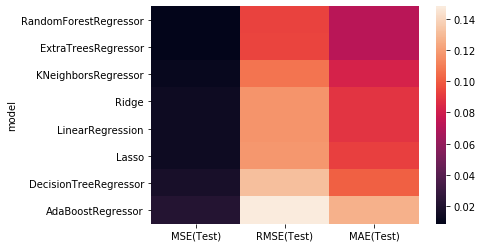

In [200]:
sns.heatmap(e[["model", "MSE(Test)", "RMSE(Test)", "MAE(Test)"]].sort_values(["MSE(Test)", "MAE(Test)"], ascending=True).set_index('model'))

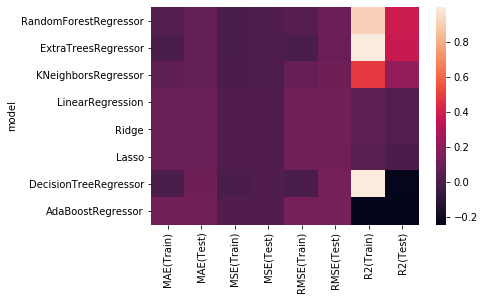

In [192]:
sns.heatmap(e.sort_values(["MSE(Test)", "MAE(Test)", "R2(Test)"], ascending=True).set_index('model'))

0        0.32
1        0.24
2        0.35
3        0.29
4        0.26
         ... 
99994    0.27
99995    0.34
99996    0.22
99997    0.20
99999    0.34
Name: botscore, Length: 88279, dtype: float64

In [232]:
noice = data[((data.botscore != 'suspended') & (data.botscore != 'protected') & (data.botscore != 'deleted') & (~data.botscore.isna()))]
noice.botscore = noice.botscore.astype(float)
noice = noice.loc[noice.botscore > 0]

In [204]:
data['botscore'].apply(lambda x : 1 if (x > 0.5) else 0)

TypeError: '>' not supported between instances of 'str' and 'float'